## An Introduction to Classes with Radiation Laws.

 The concept of "class" is usually, if not always, connected to the Object Oriented Programming (OOP) framework. This can be seen as some kind of alternative to Sequential Programming, and indeed the two approaches have many practical differences.
 
 Now we will try to see the usefulness of OOP (and why you should start to learn it as soon as possible) first by showing how things are done sequentially, with the aid of the good old Blackbody Radiation Laws.
 
 By the way, if you are not familiar with these Laws you can read about them in many celebrated books on Meteorology$^{1,2}$.

First we will start by importing two very useful packages: NumPy and Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we can conveniently define a range for our wavelength ($ \lambda$) values. Let's say, from 0.1 to 2.0 micrometers ($\mu m$).

In [2]:
wvlg = np.arange(0.1,2.0,0.01) # wavelength
lmbd = wvlg * 1E-6

np.arange says: create an array from 0.1 to 1.99 at the pace of 0.01 (check this out!)

The first Law we will use is, of course, Planck's Law. It can be defined as: 

$ B_{\lambda}(T): \frac {C_{1} \lambda^{-5}} {\pi (exp( \frac{C_{2}} {\lambda T}) -1)}  $

Where $C_{1} = 3.74 \times 10^{-16}$ $W m^{-2} $ and $C_{2} = 1.45 \times 10^{-2}$ m K. 

To make things interesting we will plot an Emission Spectra for Blackbodies with different absolute temperatures (T), just like the ones from our textbooks.

For simplicity, let us define $ \frac{C_{2}} {\lambda T} $ as a single variable Cx. That is:  

In [3]:
C1  =  3.74E-16
C2  =  1.45E-2
T1  =  5000.    # first absolute temperature value (K)
Ca  =  C2 / (lmbd * T1)

The Intensity of Emitted Radiation for a blackbody with absolute temperature of 5000 K will be:  

In [4]:
Pa  =  C1 * (lmbd ** -5.) / (np.pi * ( np.exp(Ca)-1) )

Now let us do the same for 6000 K and 7000 K.

In [5]:
T2  =  6000 
T3  =  7000

Cb  =  C2 / (lmbd * T2)
Cc  =  C2 / (lmbd * T3)

Pb  =  C1 * (lmbd ** -5.) / (np.pi * (np.exp (Cb) -1))
Pc  =  C1 * (lmbd ** -5.) / (np.pi * (np.exp (Cc) -1))

Have in mind that since we want to compute B for different values of T, we are forced to make these repetitions to keep their results if we want to use them later. That's a downpoint of sequential programming.

Ok, now the fun part. Let's plot our spectra with matplotlib.

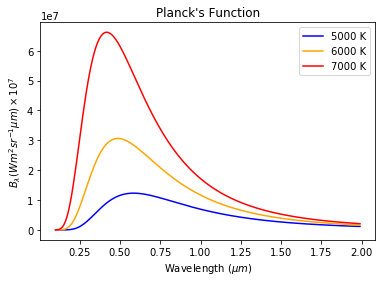

In [6]:
plt.plot(wvlg, Pa * 1E-6,'blue',   label='5000 K')
plt.plot(wvlg, Pb * 1E-6,'orange', label='6000 K')
plt.plot(wvlg, Pc * 1E-6,'red',    label='7000 K')
plt.legend(loc='upper right')
plt.ticklabel_format(style='sci', axis='y')
plt.title("Planck's Function")
plt.xlabel(r'Wavelength ($\mu m$)')
plt.ylabel(r'$ B_{\lambda} (W m^{2} sr^{-1} \mu m) \times 10^{7}  $')


plt.show()

Now that we made it, we can go on with the other Laws. Next is the Stefan-Boltzmann Law, which can be defined as:

$ E = \epsilon \sigma T^{4} $, where $\epsilon$ is the body's emissivity (1 for a blackbody) and $\sigma = 5.67 \times 10^{-8}$ $W m^{-2} K^{-4}$ the Stefan-Boltzmann constant.

We will compute it for the same temperature values we used above for Planck's Law.

In [7]:
epsilon =  1 
sigma   =  5.67 * 1E-8

Ea  =  epsilon * sigma * T1 ** 4
Eb  =  epsilon * sigma * T2 ** 4
Ec  =  epsilon * sigma * T3 ** 4

In [8]:
print (Ea, Eb, Ec)

35437500.0 73483200.0 136136700.0


To finish the sequential part of this notebook, now it's time for Wien's Displacement Law:

$ \lambda_{m} = \frac{2897}{T} $  

This one is a piece of cake, isn't it?

In [9]:
Wa  = 2897 / 5000
Wb  = 2897 / 6000
Wc  = 2897 / 7000

In [10]:
print (Wa, Wb, Wc)

0.5794 0.48283333333333334 0.41385714285714287


Well, all of this code above is giving us an example of sequential programming. We can see we had to define lots of global variables and this is generally considered bad programming$^{3}$ especially if you're writing God knows how many lines of code, and it's very easy to change by accident one of these variables and get yourself some bad headaches and lost hours.

Classes, far from being simply a sociological concept preferred by Marxists, are very useful programming structures. One should approach this concept right after being familiar with the concept of 'functions' (if you're not, I recommend you to spend some time learning it), because Classes are sets of variables and functions as well.

Every class has a name, which by convention starts with a capital letter. Let us call it 'Rad'.

Also every class starts with a function called 'constructor', used to define your variables inside the class. That is:

In [11]:
class Rad:
    def __init__(self, T, wvlg, epsilon): 
        self.T        =  T            # temperature (K)
        self.wvlg     =  wvlg * 1E-6  # wavelength (m) 
        self.epsilon  =  epsilon      # emissivity

For starters, the 'self' parameter can be a very mysterious one. We won't attempt to define it, just like some books on scientific computing usually do, but you can see it as a way to recognize your variables so you can carry them around your class without having to define them for every function there (this will be clearer soon). Also, be aware that indentation is very important when you are writing Python.

In [12]:
    def planck(self, c1 = 3.74E-16, c2 = 1.45E-2):
        self.c    =  c2 / (self.wvlg * self.T) 
        self.B    =  c1 * (self.wvlg ** -5.) / (np.pi*(np.exp(self.c)-1))
        return  self.B 

    def stefan(self, sigma = 5.67E-8):
        self.E  =  self.epsilon * sigma * (self.T**4.)
        return self.E

    def wien(self):
        self.wmax = 2897 / self.T  # wavelength (micrometer) of the maximum monocromatic intensity
        return self.wmax


The class and it should be is:

In [13]:
class Rad:
    def __init__(self, T, wvlg, epsilon): 
        self.T        =  T            # temperature (K)
        self.wvlg     =  wvlg  # wavelength (m) 
        self.epsilon  =  epsilon      # emissivity
               
    def planck(self, c1 = 3.74E-16, c2 = 1.45E-2):
        self.c    =  c2 / (self.wvlg * self.T) # this is just for simplicity
        self.ex   =  np.exp(self.c, dtype=np.float64)
        self.B    =  c1 * (self.wvlg ** -5.) / (np.pi*(self.ex-1))
        return  self.B # intensity of emitted radiation

    def stefan(self, sigma = 5.67E-8):
        self.E  =  self.epsilon * sigma * (self.T**4.)
        return self.E

    def wien(self):
        self.wmax = 2897 / self.T  # wavelength (micrometer) of the maximum monocromatic intensity
        return self.wmax

Just as we did before, the 'planck' function stands for Planck's Law, 'stefan' for Stefan-Boltzmann and 'wien' for Wien's. And that's it, all the Radiation Laws defined in a very simple way.

Hopefully you will see the usefulness of the 'self' parameter now. We are saying that we will continue to use the variables of the constructor function for the other functions inside the class.

Ok, now let's do what we have to do. First, we will put some values for our class. 

In [14]:
B1  =  Rad(5000,lmbd,1) 
B2  =  Rad(6000,lmbd,1)  
B3  =  Rad(7000,lmbd,1) 

We have defined values for absolute temperature, wavelength and emissivity but still we have no calculations and no results. We are just saying the values to be used.

In [15]:
P1  =  B1.planck()
P2  =  B2.planck()
P3  =  B3.planck()

P1, P2 and P3 are the results (yes, the results) for Planck's Law. In the same way, we can get the results for the other Laws from the values we defined for B1, B2 and B3.

In [16]:
S1  =  B1.stefan()
S2  =  B2.stefan()
S3  =  B3.stefan()

W1  =  B1.wien()
W2  =  B2.wien()
W3  =  B3.wien()

In [17]:
print (S1, S2, S3)

35437500.0 73483200.0 136136700.0


In [18]:
print (W1, W2, W3)

0.5794 0.48283333333333334 0.41385714285714287


So, everything is as it should be. Let's remake the spectra and be done with this lesson. 

Hope you have enjoyed it!

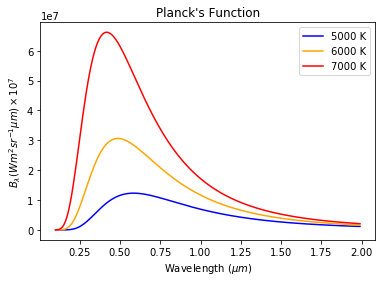

In [19]:
plt.plot(wvlg, P1 * 1E-6 ,'blue',   label='5000 K')
plt.plot(wvlg, P2 * 1E-6,'orange', label='6000 K')
plt.plot(wvlg, P3 * 1E-6,'red',    label='7000 K')
plt.legend(loc='upper right')
plt.ticklabel_format(style='sci', axis='y')
plt.title("Planck's Function")
plt.xlabel(r'Wavelength ($\mu m$)')
plt.ylabel(r'$ B_{\lambda} (W m^{2} sr^{-1} \mu m) \times 10^{7}  $')


plt.show()

## REFERENCES 

1 - Liou, Kuo-Nan. An introduction to atmospheric radiation. Vol. 84. Academic press, 2002.

2 - Wallace, John M., and Peter V. Hobbs. Atmospheric science: an introductory survey. Vol. 92. Academic press, 2006.

3 - Langtangen, Hans Petter. A primer on scientific programming with Python. Vol. 7. Springer, 2009.